To understand why our 2 layer net can't effectively learn the XOR labels, it may be helpful to consider the follwing graph: 



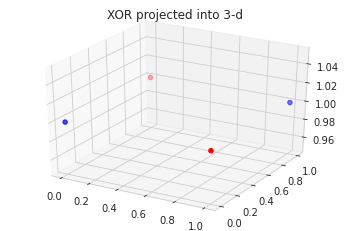

In [10]:
#convert to numpy arrays, as required for plotting functions
Bool_bias_np=np.array(Bool_bias)
#we will plot each point as red if the XOR relation is satisfied, and blue if not 
XOR_colors=['blue','red','red','blue']
ax=plt.axes(projection='3d')

ax.scatter(Bool_bias_np[:,0],Bool_bias_np[:,1],Bool_bias_np[:,2],color=XOR_colors)
plt.title('XOR projected into 3-d')
plt.show()

##  <a id='e3'>Exercise 4: Limitations of the Perceptron Learning Rule</a> 


**Looking at the graph above, why do you think that the network had trouble learning the XOR relation, but not the AND or the OR?**


This example was important from a historical perspective. In the 1960s, Marvin Minsky and Seymour Papert showed that it was impossible for a simple neural network such as this one to learn the XOR relation. This caused people to lose interest in neural networks for a long time. However the interest was revived in the 1980s with the development of the Backpropagation algorithm, which showed how to generalize the Perceptron Learning Rule to networks with any number of layers. The ability to train networks with more than two layers allowed them to effectively learn XOR, as well as many other much more complex relations. 

# BUILD

# Appendix: Derivation of Learning Rule for two-layer network with sigmoidal activation

Sigmoid neurons take inputs and produce outputs similar to perceptrons, however, the inputs and outputs are not binary. Additionally, rather than applying a simple dot product to the inputs such that
\begin{equation}
z(w,x) = w \cdot x + b
\end{equation}

these new types of neurons apply the sigmoid function, of the form

\begin{equation}
\sigma(z(w,x))=\frac{1}{1+e^{-z(w,x)}}
\end{equation}

. 
This function is actually the same as a Logistic function with a bias value of 0 and a gain value of 1. It has an upper bound at 1 and a lower bound at zero. This can be seen by examining the limits: $\lim_{z(w,x)\to\infty} \sigma(z(w,x))$ and $\lim_{z(w,x)\to -\infty} \sigma(z(w,x))$. Although its equation looks complex, a sigmoid function can quickly become intuitive when you try modifying the parameters, as we did in Lab 1 with the Logistic function. The graph below illustrates gives the graph of $\sigma(x)$.


<img src="https://drive.google.com/uc?id=11pGLSRaXt-eeBp37P0iTc3AmAsdb4Q1_"> 


In a multilayer network, the output of multiple sigmoid functions in the first non-input layer forms the input to the next layer. However, because of its bounded structure, a sigmoid function only outputs 1 or 0 at the limits (when rounding error kicks in). Typically its output will be somewhere in between. Therefore, there will always be some error between the desired output of a logical function (1 or 0) and the output of a sigmoid. The error of a single output is given by  
  
\begin{equation}
E=desired \ output - \sigma(z(w,x))
\end{equation}  
  
A common measure of error is called the mean squared error, and is given by  
  
\begin{equation}
E =
\frac{1}{n} \ \sum_{i=1}^{n} (desired \ output_{i} - \sigma(z(w,x))_{i})^2
\end{equation}  
  
Although we cannot drive this value to zero (when our desired output is binary), we can minimize it. Because it is a sum of squares, we can minimize it by minimizing each term. Because each term is a convex function of the weights, it is minimized when its derivative as a function of the weights is zero. We can train our neural net to do this using the delta rule, which is very similar to the perceptron learning rule. 

\begin{equation}
w^{t+1} = \underbrace{w^t}_\text{current weight} + \underbrace{\Delta w^t}_\text{weight change}
\end{equation}

where 

\begin{equation}
\Delta w^t = - \alpha \underbrace{\frac{\partial E^t}{\partial w^t}}_\text{change in error terms as a function of the weights}
\end{equation}

.
  
As you can see, when the derivative of the error is zero, the weights stop changing. The error is, at this point, minimized.  
  
In order to calculate the derviative of the error, we simply employ the chain rule. We will aslo be using a modified form of the error. Instead of scaling each term by $\frac{1}{n}$, we will scale by $\frac{1}{2}$ 

So, each error term is given by 
  
\begin{equation}
E_{i} =
\frac{1}{2} (desired \ output_{i} - \sigma(h(x))_{i})^2
\end{equation}  
  
and its derivative is given by  
  
\begin{equation}
\frac{\partial E_{i}}{\partial w} = \underbrace{\frac{\partial E_{i}}{\partial \sigma(h(w,x))}}_\text{derivative 1} \quad
\underbrace{\frac{\partial \sigma(h(w,x))}{\partial h(w,x)}}_\text{derivative 2} \quad
\underbrace{\frac{\partial h(w,x)}{\partial w}}_\text{derivative 3}
\end{equation}
  
Now, because $h(w,x)$ is a vector equation, its derivative is also a vector. This produces our vector of weight changes, each term of which is determined by derivative 3  
  
\begin{equation}
\quad
\underbrace{\frac{\partial h(w,x)}{\partial w_{i}}}_\text{derivative 3}
\end{equation}  
.

This comes out surprisingly tidily:  
  
\begin{equation}
{\frac{\partial E^t}{\partial w_{i}^t}}=(desired \ output - \sigma) (\sigma (1 - \sigma))x_{i}
\end{equation}  
  
Now 
\begin{equation}
\Delta w^t_{i} = - \alpha (desired \ output - \sigma) (\sigma (1 - \sigma))x_{i}
\end{equation}
  
Biases are updated in much the same fashion, using
  
\begin{equation}
\Delta b^t_{i} = - \alpha (desired \ output - \sigma) (\sigma (1 - \sigma))1
\end{equation}